**RECOMENDABLE CORRER TODAS LAS CELDAS EN CASO DE CAMBIAR VALORES, COMO LA VELOCIDAD INCIAL, DISTANCIA HOROZONTAL O ALTURA**

**Constantes:** \\
$v_0$=Velocidad inicial \\
$g$=Gravedad \\
$h$=Altura del aro \\
$d$=Distancia horizontal del aro \\
$r$=Radio del aro \\
$(d,h)$=Coordenada del aro \\


**Parámetro:** $$0\leq\theta\leq\pi /2$$ \\
**Ecuaciones:**$$x=x_0 + (v_0cos \theta)t \ \ \ \ ,  \ \ \ \ 0<x_0<d \ \ (*)$$ \\
$$y= (v_0sen \theta)t - \frac{1}{2}gt^{2}\ \ \ \ \ \ \ \ \ \ (**)$$ \\
$$t=\frac{v_0sen \theta + \sqrt{(v_0sen \theta)^{2}-2gh}}{g}\ \ \ \ \ \ \ \ \ \ (***)$$

In [118]:
import numpy as np
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


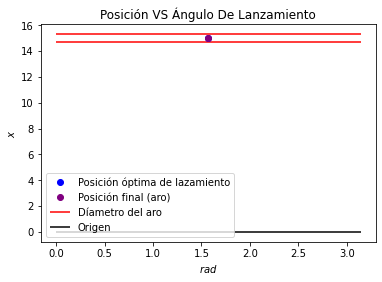

In [119]:
vo=200 #Velocidad inicial en m/s 
g=9.8 
h=3 #Altura del aro en metros
d=15 #Distancia horizontal del aro en metros
THETA=np.linspace(0.01,np.pi/2,100) #Theta será el parámetro


#Escribimos el tiempo en términos del ángulo para trabajar con un sólo parámetro
t=((vo*np.sin(THETA)+np.sqrt((vo*np.sin(THETA))**2-2*g*h)))/g
xo=d-vo*np.cos(THETA)*t
x=vo*np.cos(THETA)*t + xo
v=vo*np.sin(THETA) -g*t




def xf(THETA, xo): #Función que calcula la posición final horizonal del balón
    x=vo*np.cos(THETA)*t + xo
    for i in range(0,100):
        if 0<xo[i]<d and abs(x[i]-d)<0.3 and v[i]<0: #Se debe garantizar que la pelota pase por encima del aro y que esté dentro del diametro
            return x[i]


def xs(THETA):#Función que me da el ángulo, posición respecto al aro y tiempo de vuelo
    for i in range(0,100):
        if 0<xo[i]<d and abs(x[i]-d)<0.3 and v[i]<0: #Se debe garantizar que la pelota pase por encima del aro y que esté dentro del diametro
            V = { "Ángulo (°)": THETA[i]*(180/np.pi),"Posición (m)": xo[i],"Tiempo de vuelo (s)": t[i] }
               
            return V


#Ilustración
plt.plot(xs(THETA)[ "Ángulo (°)"]*(np.pi/180),xs(THETA)[ "Posición (m)"],'o', color="blue",label="Posición óptima de lazamiento")
plt.hlines(d+0.3,0,np.pi, color="red", label="Díametro del aro")
plt.hlines(d-0.3,0,np.pi, color="red")
plt.hlines(0,0,np.pi, label="Origen")
plt.title("Posición VS Ángulo De Lanzamiento")
plt.plot(xs(THETA)[ "Ángulo (°)"]*(np.pi/180), xf(THETA, xo),'o',color="purple", label="Posición final (aro)")
plt.xlabel("$rad$")
plt.ylabel("$x$")
plt.legend()


In [120]:
xs(THETA)

{'Posición (m)': 14.9999999999995,
 'Tiempo de vuelo (s)': 40.801321014056825,
 'Ángulo (°)': 90.0}

In [121]:
#Variables por graficar la trayectoria 

t1=np.arange(0, xs(THETA)["Tiempo de vuelo (s)"],0.01)
x1=vo*np.cos(xs(THETA)["Ángulo (°)"]*(np.pi/180))*t1 + xs(THETA)["Posición (m)"]
y1=vo*np.sin(xs(THETA)["Ángulo (°)"]*(np.pi/180))*t1 -(0.5)*g*t1**2

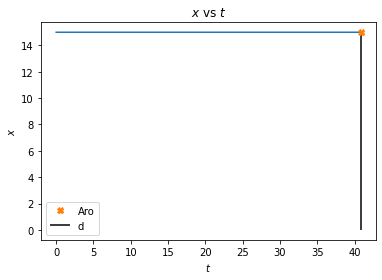

In [122]:
#Gráfica x vs t
plt.figure()
plt.plot(t1,x1)
plt.title("$x$ vs $t$")
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.vlines(xs(THETA)["Tiempo de vuelo (s)"],0,d,color="black", label="d")
plt.plot(xs(THETA)["Tiempo de vuelo (s)"],d,'X',label="Aro")
plt.legend()


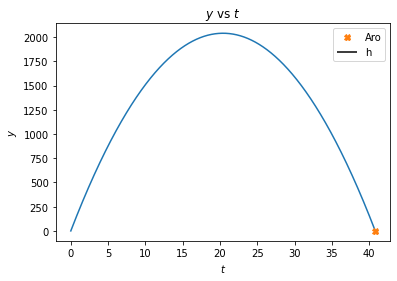

In [123]:
#Gráfica y vs t
plt.figure()
plt.plot(t1,y1)
plt.title("$y$ vs $t$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.vlines(xs(THETA)["Tiempo de vuelo (s)"],0,h,color="black", label="h")
plt.plot(xs(THETA)["Tiempo de vuelo (s)"],h,'X',label="Aro")
plt.legend()

